In [64]:
import pandas as pd
import seaborn as sns

In [60]:
# df_test = pd.read_csv('titanic_test.csv')
df_train = pd.read_csv('titanic_train.csv')

# df_ = pd.concat([df_test, df_train], axis=0)
# df = df_.copy()
# df

In [8]:
# df['Survived'].value_counts(dropna=False)

0.0    549
NaN    418
1.0    342
Name: Survived, dtype: int64

In [7]:
# print(df_test.shape, df_train.shape)

(418, 11) (891, 12)


In [9]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
# df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [61]:
df_train['Pclass'] = df_train['Pclass'].astype('int8')
df_train['Fare'] = df_train['Fare'].astype('int16')

<AxesSubplot:ylabel='Frequency'>

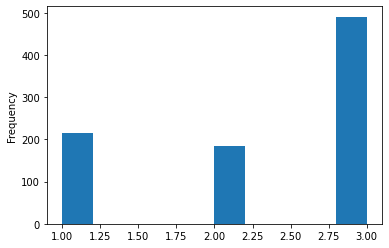

In [62]:
df_train['Pclass'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

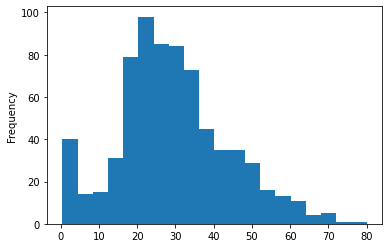

In [63]:
df_train['Age'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

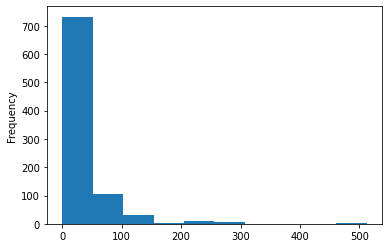

In [50]:
df_train['Fare'].plot(kind='hist')

<AxesSubplot:xlabel='Age', ylabel='Survived'>

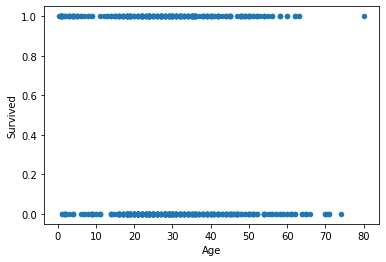

In [51]:
df_train[['Survived', 'Age']].plot(kind='scatter', x='Age', y='Survived')

<AxesSubplot:ylabel='Sex'>

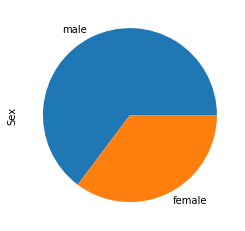

In [52]:
df_train['Sex'].value_counts().plot.pie()

<AxesSubplot:ylabel='Embarked'>

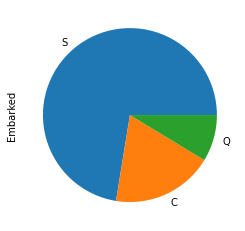

In [41]:
df_train['Embarked'].value_counts().plot.pie()

In [132]:
titles_map = {
    "Mr": "Mr",
    "Mme": "Mrs",
    "Ms": "Mrs",
    "Mrs": "Mrs",
    "Master": "Master",
    "Mlle": "Miss",
    "Miss": "Miss",
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Dr": "Officer",
    "Rev": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Lady": "Royalty"
}

titles_to_digits_map = {
    "Mr": 0,
    "Mrs": 1,
    "Master": 2,
    "Miss": 3,
    "Officer": 4,
    "Royalty": 5,
}

df_clean = df_train.copy()
df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1}).astype('int8')
# Note: Embarked '0' is NAN
df_clean['Embarked'] = df_clean['Embarked'].fillna(0)
df_clean['Embarked'] = df_clean['Embarked'].map({'S': 1, 'C': 2, 'Q': 3, 0: 0}).astype('int8')
df_clean['Title'] = df_clean['Name'].str.extract(r',\s+([\w\s]+).')
df_clean['Title'] = df_clean['Title'].map(titles_map)
df_clean['Title'] = df_clean['Title'].map(titles_to_digits_map).astype('int8')
# Note: Cabin 'Z' is NAN
df_clean['Cabin'] = df_clean['Cabin'].fillna('Z')
df_clean['Cabin'] = df_clean['Cabin'].str[0]

In [115]:
df_clean[df_clean['Name'].str.find('the Countess') > 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,33.0,0,0,110152,86,B77,1


In [114]:
df_clean['Name'].str.extract(r',\s+([\w\s]+).').value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
dtype: int64

In [125]:
df_clean[df_clean['Embarked'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80,B28,0,3
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80,B28,0,1


<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

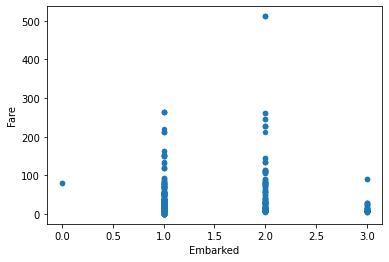

In [127]:
df_clean[['Embarked', 'Fare']].plot.scatter(x='Embarked', y='Fare')

In [150]:
cabin_b = df_clean[df_clean['Cabin'] == 'B']
cabin_b.loc[(60 < cabin_b['Fare']) & (cabin_b['Fare'] < 100), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61,B,2,0
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80,B,0,3
139,140,0,1,"Giglio, Mr. Victor",0,24.0,0,0,PC 17593,79,B,2,0
257,258,1,1,"Cherry, Miss. Gladys",1,30.0,0,0,110152,86,B,1,3
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",1,19.0,1,0,11967,91,B,2,1
369,370,1,1,"Aubart, Mme. Leontine Pauline",1,24.0,0,0,PC 17477,69,B,2,1
484,485,1,1,"Bishop, Mr. Dickinson H",0,25.0,1,0,11967,91,B,2,0
504,505,1,1,"Maioni, Miss. Roberta",1,16.0,0,0,110152,86,B,1,3
520,521,1,1,"Perreault, Miss. Anne",1,30.0,0,0,12749,93,B,1,3
540,541,1,1,"Crosby, Miss. Harriet R",1,36.0,0,2,WE/P 5735,71,B,1,3


In [133]:
df_clean['Cabin'].value_counts()

Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [130]:
df_clean[df_clean['Cabin'].str[0] == 'T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
339,340,0,1,"Blackwell, Mr. Stephen Weart",0,45.0,0,0,113784,35,T,1,0


In [123]:
df_clean['Title'].value_counts()

0    517
3    184
1    127
2     40
4     18
5      5
Name: Title, dtype: int64

In [111]:
df_clean.shape

(891, 12)

<AxesSubplot:>

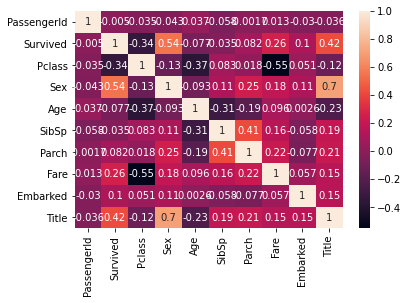

In [124]:
sns.heatmap(df_clean.corr(), annot=True)